<a href="https://colab.research.google.com/github/luanrossini/analise_liberadores/blob/main/An%C3%A1lise_Libertadores_hist%C3%B3rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Carregando dataframe
df = pd.read_csv("libertadores-results-ds.csv")

## Explorando o dataset

In [128]:
# Visualizando as primeiras 5 linhas
df.head()

,Edition,Round,Date,Home Club,Away Club,Home Score,AwayScore
0,2023,Final,4/11/2023,Fluminense FC,Boca Juniors,2,1
1,2023,Semifinal,6/10/2023,Palmeiras,Boca Juniors,1,1
2,2023,Semifinal,5/10/2023,Internacional,Fluminense FC,1,2
3,2023,Semifinal,29/09/2023,Boca Juniors,Palmeiras,0,0
4,2023,Semifinal,28/09/2023,Fluminense FC,Internacional,2,2


In [129]:
# Visualizando as colunas do dataframe
df.columns

Index(['Edition', 'Round', 'Date', 'Home Club', 'Away Club', 'Home Score',
       'AwayScore'],
      dtype='object')

In [130]:
df.dtypes

Edition        int64
Round         object
Date          object
Home Club     object
Away Club     object
Home Score     int64
AwayScore      int64
dtype: object

In [131]:
# Dimensões do dataframe
print(f"Linhas: {df.shape[0]}\nColunas: {df.shape[1]}")

Linhas: 1821
Colunas: 7


A base de dados tem 1821 linhas e 7 colunas

In [132]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100

Edition       0.0
Round         0.0
Date          0.0
Home Club     0.0
Away Club     0.0
Home Score    0.0
AwayScore     0.0
dtype: float64

In [133]:
# Verificação de dados duplicados
df.duplicated().any()

True

Existem dados duplicados na base de dados

## Tratamento e limpeza dos Dados

In [134]:
# Remover linhas duplicadas
df = df.drop_duplicates()

# Normalizando a nomenclatura dos campos do dataframe
df = df.rename(columns={
    'Edition': 'season',
    'Round': 'stage',
    'Date': 'date',
    'Home Club': 'home_club',
    'Away Club': 'away_club',
    'Home Score': 'home_score',
    'AwayScore': 'away_score'
})

# Alterando o nome do clube "Stellenbosch FC" para "Vasco da Gama" devido a uma inconsistência da base de dados
df['home_club'] = df['home_club'].replace('Stellenbosch FC', 'Vasco da Gama')
df['away_club'] = df['away_club'].replace('Stellenbosch FC', 'Vasco da Gama')



### Definindo o resultado da partida

In [135]:
# Convertendo as colunas para o tipo numérico
df['home_score'] = pd.to_numeric(df['home_score'], errors='coerce')
df['away_score'] = pd.to_numeric(df['away_score'], errors='coerce')

# Definindo a coluna de "resultado"
def determinar_resultado(home_score, away_score):
    if home_score > away_score:
        return "Vitória do time da casa"
    elif home_score < away_score:
        return "Vitória do time visitante"
    else:
        return "Empate"

df['result'] = df.apply(lambda row: determinar_resultado(row['home_score'], row['away_score']), axis=1)

### Definindo o país do time de casa e o visitante

In [136]:
df['home_club'].unique()

array(['Fluminense FC', 'Palmeiras', 'Internacional', 'Boca Juniors',
       'Olimpia', 'Racing Club', 'CS Deportivo Pereira', 'Bolívar',
       'Independiente', 'Atlético PR', 'Atlético Nacional', 'Flamengo',
       'Nacional', 'Atlético Mineiro', 'Argentinos Juniors',
       'River Plate', 'Barcelona SC', 'Colo Colo', 'Corinthians',
       'Libertad', 'Metropolitanos FC', 'Aucas', 'The Strongest',
       'Monagas SC', 'Alianza Lima', 'FBC Melgar', 'Sporting Cristal',
       'Patronato de Parana', 'Ñublense', 'Cerro Porteño', 'Liverpool',
       'Independiente Medellín', 'Huracán', 'Millonarios', 'Fortaleza',
       'CD Magallanes', 'Universidad de Chile', 'Santos FC',
       'Vélez Sarsfield', 'Vasco da Gama', 'Lanús', 'Unión Española',
       'Deportivo Quito', 'Emelec', 'Cruz Azul', 'Juan Aurich', 'Peñarol',
       'Arsenal de Sarandí', 'Junior FC', 'Nacional Asunción',
       'Guadalajara', 'Zamora FC', 'Godoy Cruz Antonio Tomba',
       'Deportivo Táchira', 'Universidad Católica'

In [137]:
def country_of_team(team_name):
    # Dicionário que mapeia nomes de times para países
    team_country_map = {
    'Fluminense FC': 'Brasil',
    'Palmeiras': 'Brasil',
    'Internacional': 'Brasil',
    'Boca Juniors': 'Argentina',
    'Olimpia': 'Paraguai',
    'Racing Club': 'Argentina',
    'CS Deportivo Pereira': 'Colômbia',
    'Bolívar': 'Bolívia',
    'Independiente': 'Argentina',
    'Atlético PR': 'Brasil',
    'Atlético Nacional': 'Colômbia',
    'Flamengo': 'Brasil',
    'Nacional': 'Uruguai',
    'Atlético Mineiro': 'Brasil',
    'Argentinos Juniors': 'Argentina',
    'River Plate': 'Argentina',
    'Barcelona SC': 'Equador',
    'Colo Colo': 'Chile',
    'Corinthians': 'Brasil',
    'Libertad': 'Paraguai',
    'Metropolitanos FC': 'Venezuela',
    'Aucas': 'Equador',
    'The Strongest': 'Bolívia',
    'Monagas SC': 'Venezuela',
    'Alianza Lima': 'Peru',
    'FBC Melgar': 'Peru',
    'Sporting Cristal': 'Peru',
    'Patronato de Parana': 'Argentina',
    'Ñublense': 'Chile',
    'Cerro Porteño': 'Paraguai',
    'Liverpool': 'Uruguai',
    'Independiente Medellín': 'Colômbia',
    'Huracán': 'Argentina',
    'Millonarios': 'Colômbia',
    'Fortaleza': 'Brasil',
    'CD Magallanes': 'Chile',
    'Universidad de Chile': 'Chile',
    'Santos FC': 'Brasil',
    'Vélez Sarsfield': 'Argentina',
    'Vasco da Gama': 'Brasil',
    'Lanús': 'Argentina',
    'Unión Española': 'Chile',
    'Deportivo Quito': 'Equador',
    'Emelec': 'Equador',
    'Cruz Azul': 'México',
    'Juan Aurich': 'Peru',
    'Peñarol': 'Uruguai',
    'Arsenal de Sarandí': 'Argentina',
    'Junior FC': 'Colômbia',
    'Nacional Asunción': 'Paraguai',
    'Guadalajara': 'México',
    'Zamora FC': 'Venezuela',
    'Godoy Cruz Antonio Tomba': 'Argentina',
    'Deportivo Táchira': 'Venezuela',
    'Universidad Católica': 'Chile',
    'Defensor Sporting': 'Uruguai',
    'Caracas': 'Venezuela',
    'Tigres UANL': 'México',
    'Once Caldas': 'Colômbia',
    'Sport Huancayo': 'Peru',
    'Real Potosí': 'Bolívia',
    'El Nacional': 'Equador',
    'Estudiantes de la Plata': 'Argentina',
    'Talleres de Cordoba': 'Argentina',
    'Colón Santa Fe': 'Argentina',
    'Tolima': 'Colômbia',
    'Deportivo Cali': 'Colômbia',
    'Red Bull Bragantino SP': 'Brasil',
    'Always Ready': 'Bolívia',
    'Independiente Petrolero': 'Bolívia',
    'América Mineiro': 'Brasil',
    'Everton CD': 'Chile',
    'Jaguares Chiapas': 'México',
    'LDU de Quito': 'Equador',
    'Cruzeiro': 'Brasil',
    'América': 'México',
    'Grêmio': 'Brasil',
    'Universidad San Martín de Porres': 'Peru',
    'Jorge Wilstermann': 'Bolívia',
    'Oriente Petrolero': 'Bolívia',
    'Guaraní': 'Paraguai',
    'San Luis FC': 'México',
    'León de Huánuco': 'Peru',
    'Deportivo Petare': 'Venezuela',
    'São Paulo': 'Brasil',
    'Defensa y Justicia': 'Argentina',
    'Santa Fe': 'Colômbia',
    'América de Cali': 'Colômbia',
    'Universitario de Deportes': 'Peru',
    'Rentistas': 'Uruguai',
    'Deportivo La Guaira FC': 'Venezuela',
    'Unión La Calera': 'Chile',
    'Delfin SC': 'Equador',
    'Tigre': 'Argentina',
    'Deportivo Binacional': 'Peru',
    'Estudiantes de Mérida': 'Venezuela',
    'Guarani FC': 'Brasil',
    'Atlético Tucumán': 'Argentina',
    'San Lorenzo de Almagro': 'Argentina',
    'Rosario Central': 'Argentina',
    'Palestino': 'Chile',
    'San José': 'Bolívia',
    'Universidad Concepción': 'Chile',
    'Deportivo Lara': 'Venezuela',
    'Cusco FC': 'Peru',
    'Botafogo FR': 'Brasil',
    'Chapecoense AF': 'Brasil',
    'Zulia': 'Venezuela',
    'Sport Boys Warnes': 'Bolívia',
    'Deportes Iquique': 'Chile',
    'Deportivo Capiatá': 'Paraguai',
    'Pumas UNAM': 'México',
    'Toluca FC': 'México',
    'Trujillanos FC': 'Venezuela',
    'Cobresal': 'Chile',
    'Club Puebla': 'México',
    'Universidad César Vallejo': 'Peru',
    'Montevideo Wanderers': 'Uruguai',
    'Universitario': 'Peru',
    'Mineros de Guayana': 'Venezuela',
    'Atlas': 'México',
    'Danubio': 'Uruguai',
    'Monarcas Morelia': 'México',
    'Santos Laguna': 'México',
    'León': 'México',
    "Newell's Old Boys": 'Argentina',
    "O'Higgins": 'Chile',
    'Deportivo Anzoátegui': 'Venezuela',
    'Club Tijuana': 'México',
    'Huachipato': 'Chile'
    }

    # Verificar se o nome do time está no dicionário de mapeamento
    if team_name in team_country_map:
        return team_country_map[team_name]
    else:
        return "País não encontrado para este time"


In [138]:
# Inserir o país dos times mandantes e visitantes
df['country_home'] = df['home_club'].apply(country_of_team)
df['country_away'] = df['away_club'].apply(country_of_team)

df.head()

,season,stage,date,home_club,away_club,home_score,away_score,result,country_home,country_away
0,2023,Final,4/11/2023,Fluminense FC,Boca Juniors,2,1,Vitória do time da casa,Brasil,Argentina
1,2023,Semifinal,6/10/2023,Palmeiras,Boca Juniors,1,1,Empate,Brasil,Argentina
2,2023,Semifinal,5/10/2023,Internacional,Fluminense FC,1,2,Vitória do time visitante,Brasil,Brasil
3,2023,Semifinal,29/09/2023,Boca Juniors,Palmeiras,0,0,Empate,Argentina,Brasil
4,2023,Semifinal,28/09/2023,Fluminense FC,Internacional,2,2,Empate,Brasil,Brasil


### Tratando as opções da coluna 'stage'

In [139]:
# Definir uma função para alterar os valores da coluna 'stage'
def alterar_stage(valor):
    if valor.startswith('Group'):
        return 'Group Stage'
    else:
        return valor

# Aplicar a função à coluna 'stage'
df['stage'] = df['stage'].apply(alterar_stage)

### Incluindo a informação de placar na base

In [140]:
# Concatenar as colunas 'home_score' e 'away_score' em uma única coluna 'placar'
df['scoreboard'] = df['home_score'].astype(str) + 'x' + df['away_score'].astype(str)
df.head()

,season,stage,date,home_club,away_club,home_score,away_score,result,country_home,country_away,scoreboard
0,2023,Final,4/11/2023,Fluminense FC,Boca Juniors,2,1,Vitória do time da casa,Brasil,Argentina,2x1
1,2023,Semifinal,6/10/2023,Palmeiras,Boca Juniors,1,1,Empate,Brasil,Argentina,1x1
2,2023,Semifinal,5/10/2023,Internacional,Fluminense FC,1,2,Vitória do time visitante,Brasil,Brasil,1x2
3,2023,Semifinal,29/09/2023,Boca Juniors,Palmeiras,0,0,Empate,Argentina,Brasil,0x0
4,2023,Semifinal,28/09/2023,Fluminense FC,Internacional,2,2,Empate,Brasil,Brasil,2x2


In [141]:
df.scoreboard.unique()

array(['2x1', '1x1', '1x2', '0x0', '2x2', '1x3', '2x0', '0x4', '0x1',
       '3x0', '3x1', '4x2', '1x0', '4x0', '3x2', '4x1', '5x0', '0x2',
       '0x3', '5x1', '8x0', '6x0', '2x3', '3x3', '4x4', '7x1', '8x1',
       '3x4', '7x0', '0x5', '1x4', '2x4', '6x1', '5x2', '6x2', '7x2',
       '2x6', '0x6', '4x3', '5x4', '2x7', '1x5', '4x5', '5x3', '3x5',
       '2x5'], dtype=object)

In [142]:
# Normalizando os placares que são iguais
def normalizar_placar(placares):
    if placares == '0x1' or placares == '1x0':
        return '1x0'
    if placares == '0x2' or placares == '2x0':
        return '2x0'
    if placares == '0x3' or placares == '3x0':
        return '3x0'
    if placares == '0x4' or placares == '4x0':
        return '4x0'
    if placares == '0x5' or placares == '5x0':
        return '5x0'
    if placares == '0x6' or placares == '6x0':
        return '6x0'
    if placares == '0x7' or placares == '7x0':
        return '7x0'

    if placares == '1x2' or placares == '2x1':
        return '2x1'
    if placares == '1x3' or placares == '3x1':
        return '3x1'
    if placares == '1x4' or placares == '4x1':
        return '4x1'
    if placares == '1x5' or placares == '5x1':
        return '5x1'
    if placares == '1x6' or placares == '6x1':
        return '6x1'
    if placares == '1x7' or placares == '7x1':
        return '7x1'

    if placares == '2x3' or placares == '3x2':
        return '3x2'
    if placares == '2x4' or placares == '4x2':
        return '4x2'
    if placares == '2x5' or placares == '5x2':
        return '5x2'
    if placares == '2x6' or placares == '6x2':
        return '6x2'
    if placares == '2x7' or placares == '7x2':
        return '7x2'

    if placares == '3x4' or placares == '4x3':
        return '4x3'
    if placares == '3x5' or placares == '5x3':
        return '5x3'
    if placares == '3x6' or placares == '6x3':
        return '6x3'
    if placares == '3x7' or placares == '7x3':
        return '7x3'

    if placares == '4x5' or placares == '5x4':
        return '5x4'
    if placares == '4x6' or placares == '6x4':
        return '6x4'
    if placares == '4x7' or placares == '7x4':
        return '7x4'

    if placares == '5x6' or placares == '6x5':
        return '6x5'
    if placares == '5x7' or placares == '7x5':
        return '7x5'

    if placares == '6x7' or placares == '7x6':
        return '7x6'

    else:
        return placares


# Criar coluna 'scoreboard_ajustado' aplicando a função normalizar_placar
df['scoreboard_ajustado'] = df['scoreboard'].apply(normalizar_placar)


# Perguntas & Respostas

### 1. Qual o time que mais tem jogos durante o período analisado?

In [144]:
# Contagem de ocorrências de cada clube nas colunas 'home_club' e 'away_club'
contagem = pd.concat([df['home_club'], df['away_club']]).value_counts()

# Encontrar o time mais frequente
time_mais_frequente = contagem.idxmax()
frequencia = contagem.max()

print(f"Time com mais jogos: {time_mais_frequente} - {frequencia} jogos")

Time com mais jogos: Boca Juniors - 111 jogos


### 2. Qual a distribuição histórica dos resultados? E por fase da competição?

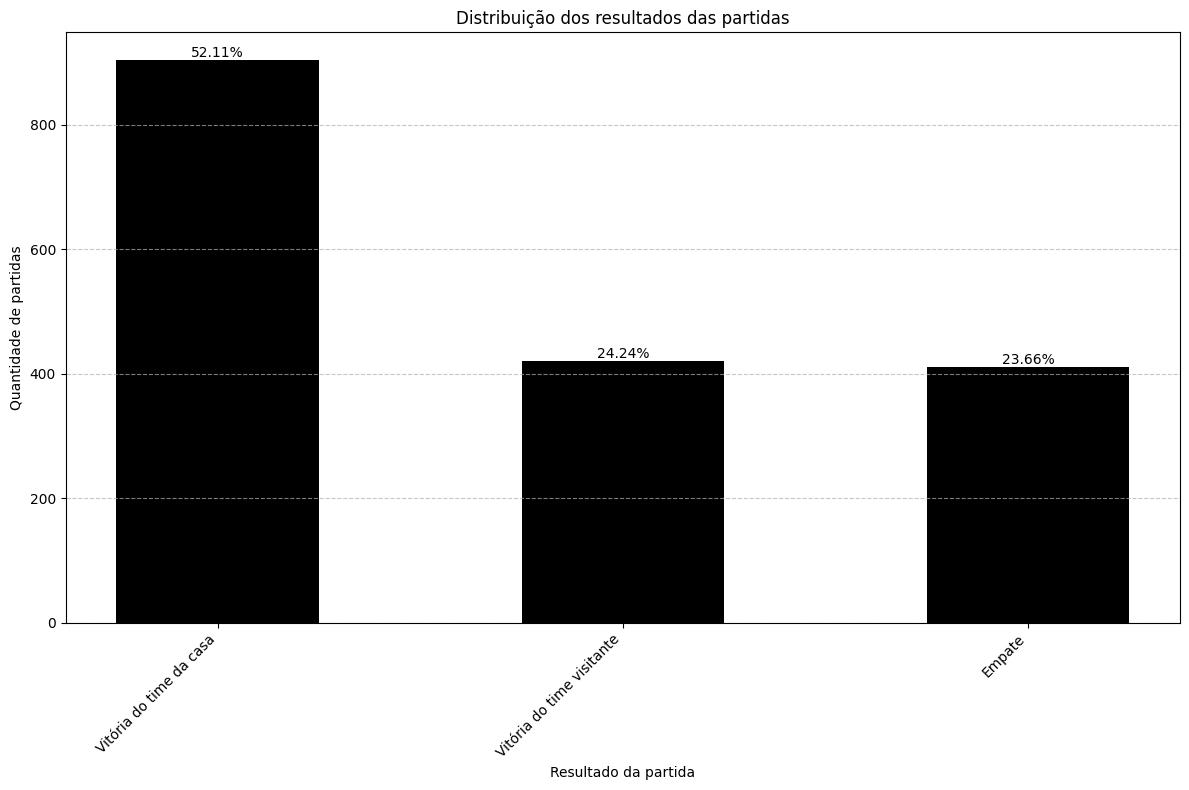

In [145]:
# Agrupando a quantidade de gols por tipo
qtd_resultados = df.groupby(['result']).size().reset_index(name='quantidade')
qtd_resultados

# Ordenar os valores por 'quantidade' em ordem decrescente
results = qtd_resultados.sort_values(by='quantidade', ascending=False)

# Calculando o total de partidas
total_partidas = results['quantidade'].sum()

# Plotar dos gráficos de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(results['result'], results['quantidade'], color='black', width=0.5)
plt.xlabel('Resultado da partida')
plt.ylabel('Quantidade de partidas')
plt.title('Distribuição dos resultados das partidas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos de dados com o percentual
for bar in bars:
    height = bar.get_height()
    percentual = (height / total_partidas) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentual:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Aqui é evidente a influência dos times da casa no resultado final da partida. São apresentadas abaixo alguns possíveis motivos para o resultado sempre ser positivo para o time mandante.

1 - Apoio da Torcida: Os times mandantes contam com o apoio de seus torcedores, criando um ambiente de total incentivo e pressão sobre os adversários.

2 - Familiaridade com o estádio e condições locais: Os times mandantes geralmente estão acostumados com o estádio onde jogam assim como com as condições locais, como o clima, torcida e o gramado.

3 - "Fator Campo": Os times da casa conseguem impor seu estilo de jogo e controlar o ritmo da partida, se aproveitando desse conhecimento de campo e das condições já destacadas acima.

4 - Viagens e Desgaste: Os times visitantes enfrentam longas viagens antes dos jogos e muitas horas de aeroporto e translado, o que pode resultar em cansaço e desconforto resultando em um possível desgaste dos atletas.

5 - Pressão: Jogar como visitante na Libertadores pode gerar uma pressão psicológica adicional sobre os jogadores, especialmente em estádios lotados e hostis. Essa pressão pode afetar o desempenho dos jogadores visitantes e beneficiar os times da casa.

<Figure size 1200x800 with 0 Axes>

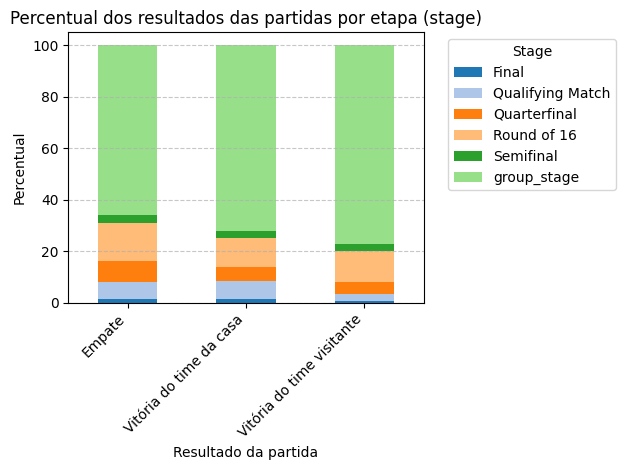

In [159]:
# Agrupando os dados por 'resultado' e 'stage' e contando as ocorrências
grouped_data = df.groupby(['result', 'stage']).size().unstack(fill_value=0)

# Normalizando os dados
grouped_data_percentual = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotar um gráfico de colunas 100% empilhadas com os percentuais
plt.figure(figsize=(12, 8))
grouped_data_percentual.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.xlabel('Resultado da partida')
plt.ylabel('Percentual')
plt.title('Percentual dos resultados das partidas por etapa (stage)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Aqui também é evidente que o fator casa é importante, independente da fase da competição. O que pode se descar é que a vitória dos times visitantes são muito concentradas na fase de grupos do torneio.

### 3. Qual o percentual de vitórias por país?

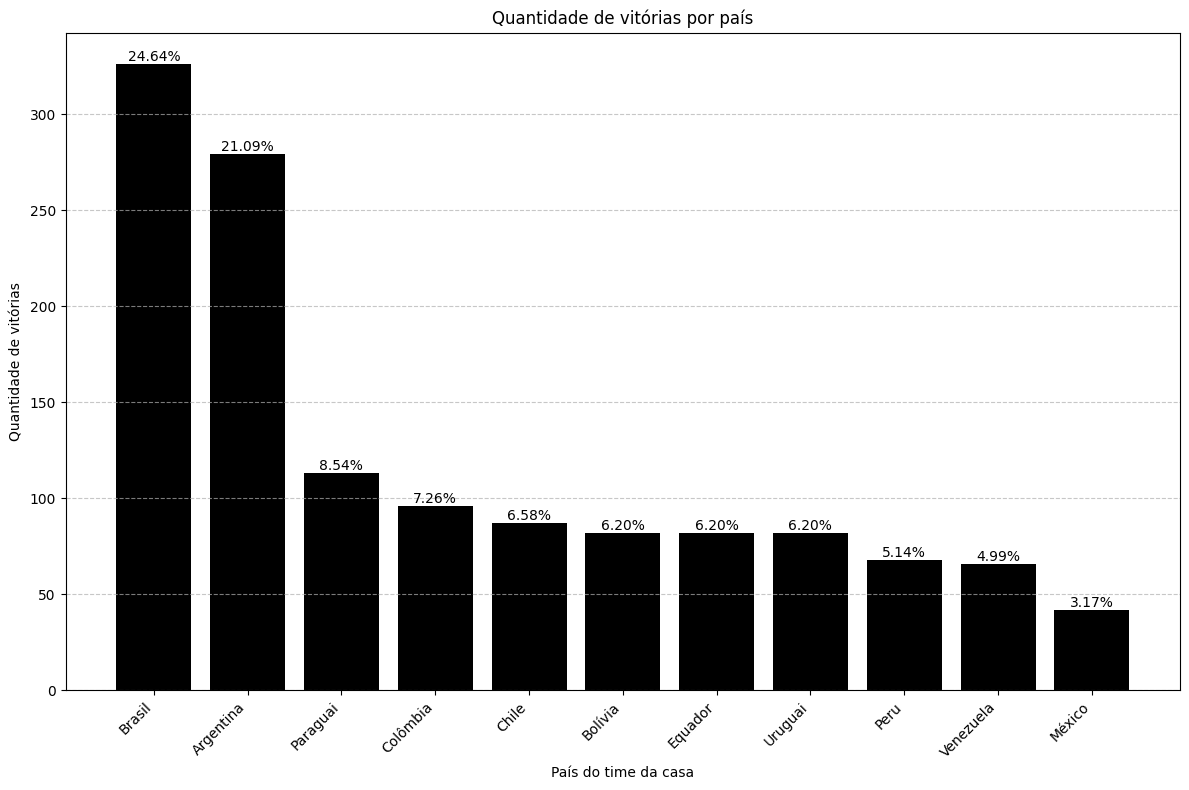

In [147]:

# Filtrando as vitórias
vitorias = df[(df['result'] == 'Vitória do time da casa') | (df['result'] == 'Vitória do time visitante')]

# Agrupando a quantidade de vitórias por país do time da casa
qtd_vitorias_por_pais = vitorias.groupby(['country_home']).size().reset_index(name='quantidade')

# Ordenação decrescente por país
qtd_vitorias_por_pais = qtd_vitorias_por_pais.sort_values(by='quantidade', ascending=False)

# Calculando o total de partidas
total_partidas = qtd_vitorias_por_pais['quantidade'].sum()

# Calculando os percentuais
qtd_vitorias_por_pais['percentual'] = qtd_vitorias_por_pais['quantidade'] / total_partidas * 100

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(qtd_vitorias_por_pais['country_home'], qtd_vitorias_por_pais['quantidade'], color='black')
plt.xlabel('País do time da casa')
plt.ylabel('Quantidade de vitórias')
plt.title('Proporção de vitórias por país')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos de dados acima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentual = qtd_vitorias_por_pais.iloc[i]['percentual']
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentual:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Os times brasileiros e argentinos têm historicamente dominado a Copa Libertadores, o principal torneio de clubes da América do Sul, por algumas razões:

1 - Tradição e História: Tanto o Brasil quanto a Argentina têm uma rica tradição no futebol, com clubes que têm uma longa história de sucesso tanto em nível nacional quanto internacional. Essa tradição cria uma cultura de excelência e aspirações de vitória em competições como a Libertadores.

2 - Investimento Financeiro: Os clubes brasileiros e argentinos têm recursos financeiros significativos em comparação com outros clubes sul-americanos. Isso permite que eles contratem jogadores de alto nível, técnicos experientes e invistam em infraestrutura e desenvolvimento de jovens talentos.

3 - Profissionalismo e Estrutura Organizacional: Os clubes brasileiros e argentinos têm uma estrutura organizacional profissionalizada, com gestão eficiente, academias de base bem estabelecidas e uma infraestrutura sólida de apoio aos jogadores. Isso contribui para um ambiente propício ao desenvolvimento e sucesso no futebol.

4 - Competições internas fortes: As ligas brasileira e argentina são consideradas duas das mais competitivas da América do Sul. Os clubes que competem nessas ligas enfrentam regularmente desafios intensos, o que os prepara bem para competições internacionais como a Libertadores.

5 - Cultura do Futebol: Tanto no Brasil quanto na Argentina, o futebol é uma paixão nacional. Esse sentimento cria um ambiente onde os jogadores são incentivados a alcançar o mais alto nível de desempenho, e os clubes são motivados a buscar sucesso em todas as competições em que participam.

6 - Histórico de Sucesso: O sucesso passado dos clubes brasileiros e argentinos na Libertadores alimenta a crença de que eles podem vencer novamente. Isso cria uma mentalidade vencedora e uma pressão adicional para manter a tradição de excelência.

### 4. Quais os países que mais tiveram times participando do torneio?

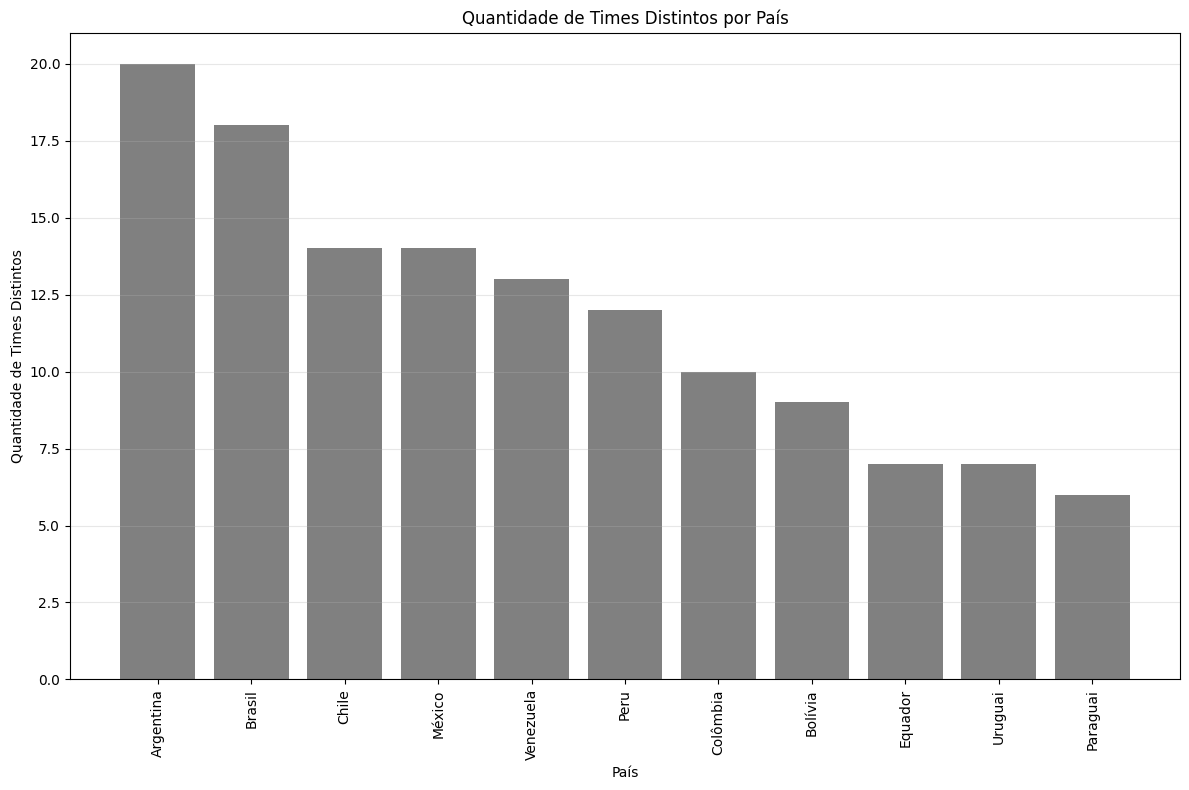

In [149]:
# Agrupar os dados pelo país do time e contar os times distintos
times_distintos_por_pais = df.groupby('country_home')['home_club'].nunique().reset_index()
times_distintos_por_pais.columns = ['País', 'Quantidade de Times Distintos']

# Ordenar os valores em ordem decrescente
times_distintos_por_pais = times_distintos_por_pais.sort_values(by='Quantidade de Times Distintos', ascending=False)

# Plotar um gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(times_distintos_por_pais['País'], times_distintos_por_pais['Quantidade de Times Distintos'], color='gray')
plt.xlabel('País')
plt.ylabel('Quantidade de Times Distintos')
plt.title('Quantidade de Times Distintos por País')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Novamente é evidenciado a tradição dos times argentinos e brasileiros na competição, fatores que influenciam essa supremacia foram mostrados já acima.

### 5. Quais os times que mais somaram pontos nessas últimas edições de Libertadores?

In [150]:
# Calculando a pontuação de cada partida
def calcular_pontuacao(resultado):
    if resultado.startswith('Vitória'):
        return 3
    elif resultado == 'Empate':
        return 1
    else:
        return 0

# Aplicando a função para calcular a pontuação de cada partida
df['pontuacao'] = df['result'].apply(calcular_pontuacao)

# Agrupando os dados pelo nome do time e somando os pontos
pontos_por_time = df.groupby('home_club')['pontuacao'].sum() + df.groupby('home_club')['pontuacao'].sum()

# Classificando os times com base na soma dos pontos em ordem decrescente
pontos_por_time = pontos_por_time.sort_values(ascending=False).reset_index()

# Renomeando as colunas
pontos_por_time.columns = ['Time', 'Pontuação']

# Exibindo a tabela com a soma dos pontos por time
pd.set_option('display.max_rows', None)  # Para mostrar todas as linhas do DataFrame
print(pontos_por_time)

                                 Time  Pontuação
0                        Boca Juniors        270
1                         River Plate        268
2                           Palmeiras        256
3                            Nacional        234
4                              Grêmio        224
5                    Atlético Mineiro        222
6                            Flamengo        218
7                       Cerro Porteño        214
8                            Libertad        196
9                             Olimpia        192
10                             Emelec        190
11                            Peñarol        186
12                      The Strongest        182
13                      Internacional        182
14                  Atlético Nacional        176
15                        Corinthians        170
16                          Santos FC        166
17                      Independiente        166
18                    Vélez Sarsfield        158
19                  

Quando se fala em Copa Libertadores da América não há como não se lembrar do Boca e do River. Os dados mostram o quanto esses dois clubes argentinos são tão tradicionais e tão temidos pelos seus adversários continentais e muito isso se explica por:

1 - História e tradição: Ambos os clubes têm uma rica história no futebol argentino e sul-americano. Boca Juniors e River Plate acumularam ao longo dos anos uma vasta coleção de títulos nacionais e internacionais.

2 - Grande base de torcedores: Boca e River possuem algumas das maiores e mais apaixonadas bases de torcedores no futebol mundial.

3 - Investimento financeiro: São clubes financeiramente mais sólidos da Argentina, com capacidade para investir em infraestrutura, contratação de jogadores de alto nível e desenvolvimento de suas categorias de base.

### 6. Quais os países que mais pontuaram nessas últimas edições de Libertadores?

In [151]:
# Calculando a pontuação de cada partida
def calcular_pontuacao(resultado):
    if resultado.startswith('Vitória'):
        return 3
    elif resultado == 'Empate':
        return 1
    else:
        return 0

# Aplicando a função para calcular a pontuação de cada partida
df['pontuacao'] = df['result'].apply(calcular_pontuacao)

# Agrupando os dados pelo nome do time e somando os pontos
pontos_por_time = df.groupby('country_home')['pontuacao'].sum() + df.groupby('country_home')['pontuacao'].sum()

# Classificando os times com base na soma dos pontos em ordem decrescente
pontos_por_time = pontos_por_time.sort_values(ascending=False).reset_index()

# Renomeando as colunas
pontos_por_time.columns = ['Time', 'Pontuação']

# Exibindo a tabela com a soma dos pontos por time
pd.set_option('display.max_rows', None)  # Para mostrar todas as linhas do DataFrame
print(pontos_por_time)

         Time  Pontuação
0      Brasil       2122
1   Argentina       1848
2    Paraguai        742
3    Colômbia        666
4       Chile        580
5     Uruguai        546
6     Bolívia        534
7     Equador        526
8        Peru        466
9   Venezuela        440
10     México        288


É importante pontuar para essa análise que os times mexicanos não são mais convidados à participar da Libertadores desde 2016, o que justifica a posição do país no quadro acima.

### 7. Qual a distribuição de pontos conquistados pelas equipes de cada país por temporada?

<ipython-input-152-28feb6d2383a>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('tab10', len(paises))


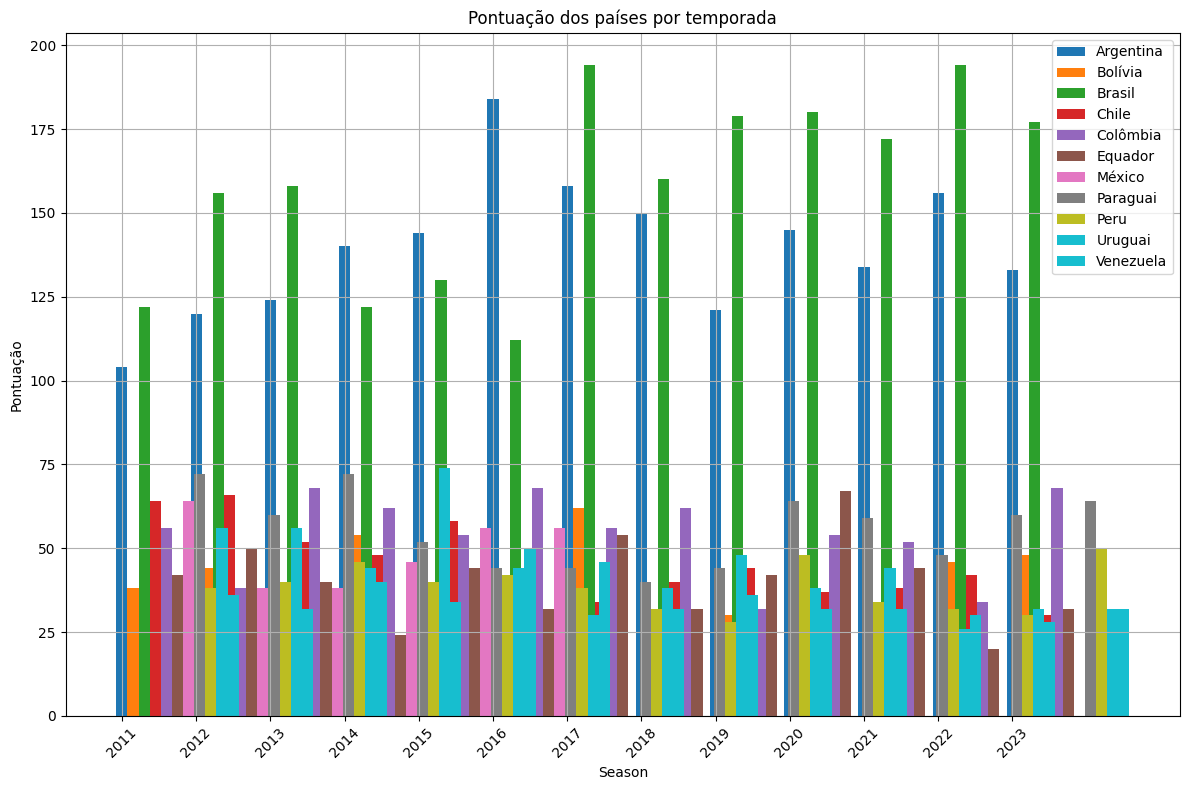

In [152]:
# Calculando a pontuação de cada partida
def calcular_pontuacao(resultado):
    if resultado.startswith('Vitória'):
        return 3
    elif resultado == 'Empate':
        return 1
    else:
        return 0

# Aplicando a função para calcular a pontuação de cada partida
df['pontuacao'] = df['result'].apply(calcular_pontuacao)

# Agrupando os dados pelo país e pela temporada (season) e somando os pontos
pontos_por_pais_season = df.groupby(['country_home', 'season'])['pontuacao'].sum() + df.groupby(['country_away', 'season'])['pontuacao'].sum()

# Resetando o índice para tornar os grupos 'team_country_home' e 'season' em colunas
pontos_por_pais_season = pontos_por_pais_season.reset_index()

# Obtendo a lista única de países
paises = pontos_por_pais_season['country_home'].unique()

# Definindo as cores para as barras
cores = plt.cm.get_cmap('tab10', len(paises))

# Plotando o gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
largura_barra = 0.15
for i, pais in enumerate(paises):
    dados_pais = pontos_por_pais_season[pontos_por_pais_season['country_home'] == pais]
    posicoes_x = np.arange(len(dados_pais))
    plt.bar(posicoes_x + i * largura_barra, dados_pais['pontuacao'], width=largura_barra, color=cores(i), label=pais)

plt.xlabel('Season')
plt.ylabel('Pontuação')
plt.title('Pontuação dos países por temporada')
plt.xticks(np.arange(len(dados_pais)), dados_pais['season'].unique(), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Nesse gráfico é também visivel como Argentina e Brasil se descatacam ao longo dos anos perante os outros times da América do Sul. Os fatores para tentar explicar esse comportamento já foram citados anteriormente.

### 8. Quais os placares mais comuns dos jogos analisados?

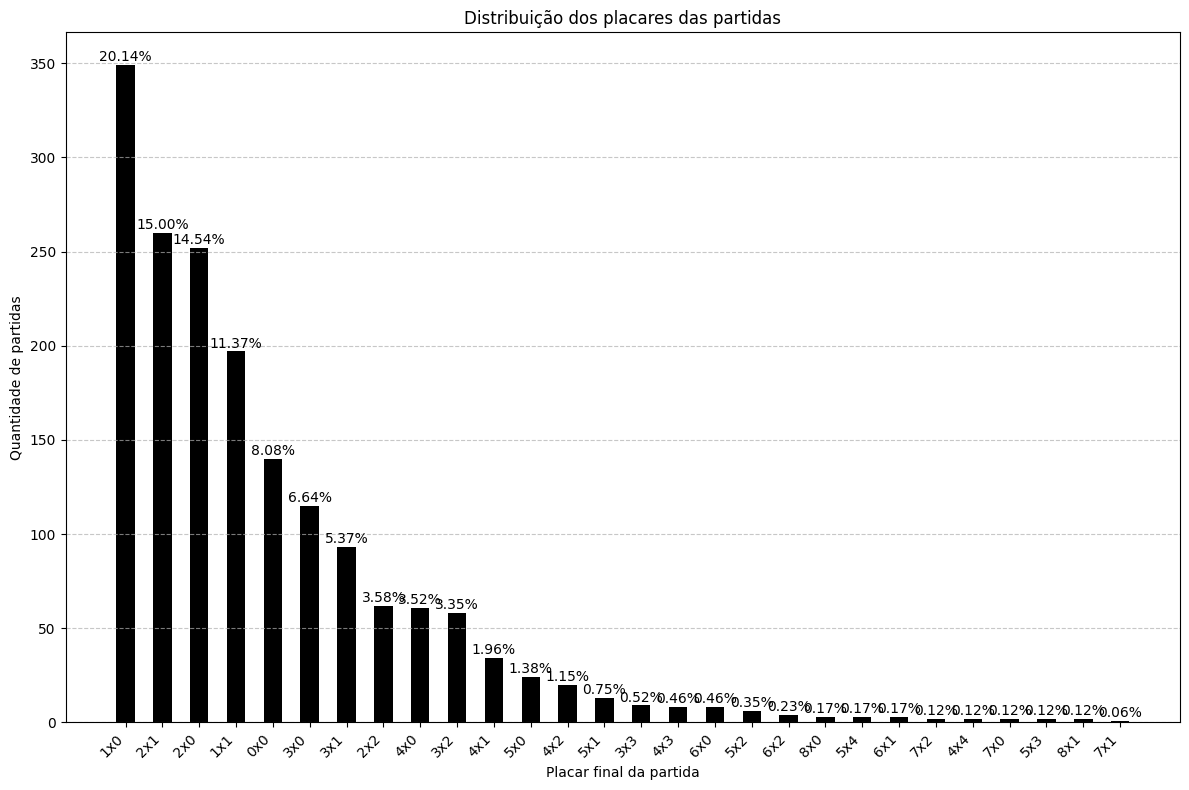

In [158]:
# Agrupando a quantidade de gols por tipo
qtd_resultados = df.groupby(['scoreboard_ajustado']).size().reset_index(name='quantidade')
qtd_resultados

# Ordenar os valores por 'quantidade' em ordem decrescente
results = qtd_resultados.sort_values(by='quantidade', ascending=False)

# Calculando o total de partidas
total_partidas = results['quantidade'].sum()

# Plotar dos gráficos de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(results['scoreboard_ajustado'], results['quantidade'], color='black', width=0.5)
plt.xlabel('Placar final da partida')
plt.ylabel('Quantidade de partidas')
plt.title('Distribuição dos placares das partidas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos de dados com o percentual
for bar in bars:
    height = bar.get_height()
    percentual = (height / total_partidas) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentual:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Os placares mais comuns das partidas tendem a ser os placares mais "apertados". Com no máximo dois gols de diferença, mostra que a competição tem um alto nível de competitividade e os duelos tendem a ter poucas goleadas ou muitos gols na mesma partida.

## Conclusão

Após uma análise abrangente dos dados da Copa Libertadores da América de 2011 a 2023, fica clara a hegemonia dos times brasileiros e argentinos em relação às equipes do restante da América do Sul.

Os padrões identificados nos dados revelam aspectos interessantes sobre o desempenho das equipes ao longo do tempo. A disparidade entre vitórias em casa e fora destaca o papel crucial do apoio da torcida e do "fator campo" na determinação dos resultados. Além disso, os placares mais "apertados" são frequentes na competição, refletindo a intensidade e equilíbrio dos jogos.

Além disso, é interessante também analisar que os placares mais "apertados" são os que mais acontecem na competição. Vitórias por no máximo 2 gols de diferença são os resultados finais mais frequentes.

Os números também evidenciam a ampla influência dos clubes brasileiros e argentinos na Copa Libertadores. Com mais times participantes e uma soma significativa de pontos ao longo dos anos, esses dois países reafirmam sua tradição e domínio no torneio. Esse sucesso é impulsionado pelo investimento financeiro e pela estrutura organizacional dos clubes, que geram retornos consistentes em forma de desempenho e títulos.

Este estudo não apenas destaca a importância da Copa Libertadores como um símbolo de identidade e unidade latino-americanas, mas também ressalta o crescente domínio dos times brasileiros e argentinos em relação aos seus concorrentes regionais.






